In [2]:
import cv2
import numpy as np

In [4]:
img = cv2.imread('lenna.png')

In [6]:
shear_x = 0.40
shear_y = -0.25

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])


rows,cols,_ = img.shape

T = np.float32([[1, 0, 0], [0, 1, 150]])

img_translation = cv2.warpAffine(img, T, (int(cols*1.5),int(rows*1.5)))
img_sheared1 = cv2.warpPerspective(img_translation,M,(int(cols*1.5),int(rows*1.5)))




In [8]:
cv2.imshow('sheard img', img_sheared1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
from skimage import transform
from skimage import io

In [12]:
img = io.imread('lenna.png')

In [61]:
shear_x= -0.5
shear_y= -0.5

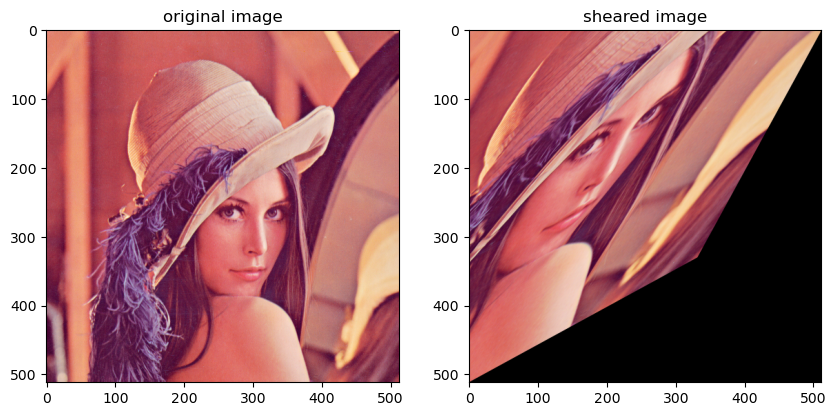

In [63]:
tform= transform.AffineTransform(shear=(shear_x,shear_y))

img_sheared= transform.warp(img,tform)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('original image')
plt.subplot(122),plt.imshow(img_sheared),plt.title('sheared image')
plt.show()

In [70]:
### AFFINE TRANSGENDER

In [116]:
img = cv2.imread('lenna.png')

tx = 80      # Translation along x axis
ty = 120     # translation along y axis
angle = 30  # rotation angle
scale = 0.5   # scaling factor
shear_x = 0.2  # shearing along x axis
shear_y= 0.0  # shearing along y axis

M = np.float32([[scale*np.cos(np.radians(angle)),shear_x,tx],
                [shear_y,scale*np.sin(np.radians(angle)),ty]])

img_affine = cv2.warpAffine(img,M,(512,512))
new_image= np.vstack([img,img_affine])
cv2.imshow('affine transformed image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
M

array([[  0.4330127,   0.2      ,  80.       ],
       [  0.       ,   0.25     , 120.       ]], dtype=float32)

In [120]:
from skimage import transform
from skimage import io

In [122]:
img = io.imread('lenna.png')

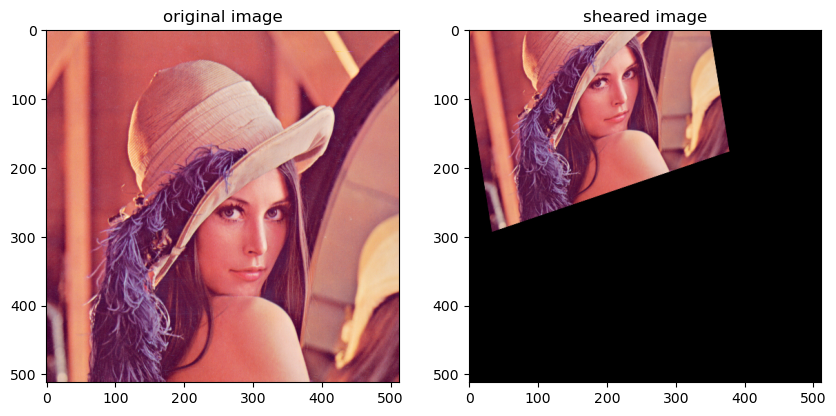

In [128]:
tx = 20      # Translation along x axis
ty = 50     # translation along y axis
angle = 20  # rotation angle
scale = 1.5   # scaling factor
shear_x = -0.2  # shearing along x axis
shear_y= 0.0 
tform = transform.AffineTransform(scale= (scale,scale),
                                  rotation= np.radians(angle),
                                  translation= (tx,ty),
                                  shear= (shear_x,shear_y))
img_affine = transform.warp(img,tform)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('original image')
plt.subplot(122),plt.imshow(img_affine),plt.title('sheared image')
plt.show()

In [130]:
## projective transformation

In [140]:
img = cv2.imread('lenna.png')

source_point = np.array([[100,50],[200,50],[200,150],[100,150]],dtype = np.float32)

destination_point = np.array([[50,50],[250,50],[200,250],[50,250]],dtype = np.float32)

M = cv2.findHomography(source_point,destination_point)[0]
img_transformed = cv2.warpPerspective(img,M,(1024,1024))

cv2.imshow('Original Image',img)
cv2.imshow('Projectively transformed Image',img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [142]:
#using skimage

In [144]:
from skimage import transform
from skimage import io

In [146]:
img = io.imread('lenna.png')

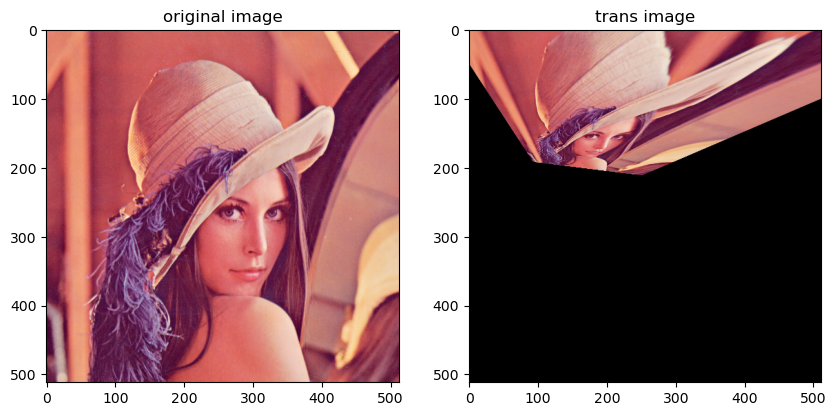

In [170]:
source_point = np.array([[0,50],[200,50],[200,150],[100,150]],dtype = np.float32)

destination_point = np.array([[0,50],[250,100],[300,250],[100,250]],dtype = np.float32)

tform= transform.ProjectiveTransform()
tform.estimate(source_point,destination_point)

img_transformed = transform.warp(img,tform)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('original image')
plt.subplot(122),plt.imshow(img_transformed),plt.title('trans image')
plt.show()

In [172]:
### morphological trans

In [177]:
 #Load image and convert to grayscale (if needed)
gray = cv2.imread('lenna.png', 0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to create binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Erosion - remove noise
eroded = cv2.erode(thresh, np.ones((3,3), np.uint8))

# Dilation - expand objects
dilated = cv2.dilate(thresh, np.ones((3,3), np.uint8))

# Opening - reduce noise while preserving object size
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# Closing - fill small holes
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

cv2.imshow('original Image',thresh)
cv2.imshow('Eroded Image',eroded)
cv2.imshow('Dilated Image',dilated)
cv2.imshow('Opening Image',opening)
cv2.imshow('Closing Image',closing)

cv2.waitKey(0)
cv2.destroyAllWindows()